# Scraping data from Understat

In [4]:
import pandas as pd 
import requests
import numpy as np 
import json 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from mplsoccer import Pitch


In [1]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match number you wish to collect data from: '))
url = base_url + match

Please enter the match number you wish to collect data from: 1769


In [2]:
url

'https://understat.com/match/1769'

In [5]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')
scripts = soup.find_all('script')

In [6]:
print(scripts[2].string)


	var rostersData	= JSON.parse('\x7B\x22h\x22\x3A\x7B\x22102904\x22\x3A\x7B\x22id\x22\x3A\x22102904\x22,\x22goals\x22\x3A\x220\x22,\x22own_goals\x22\x3A\x220\x22,\x22shots\x22\x3A\x220\x22,\x22xG\x22\x3A\x220\x22,\x22time\x22\x3A\x2290\x22,\x22player_id\x22\x3A\x222475\x22,\x22team_id\x22\x3A\x22146\x22,\x22position\x22\x3A\x22GK\x22,\x22player\x22\x3A\x22Jaume\x22,\x22h_a\x22\x3A\x22h\x22,\x22yellow_card\x22\x3A\x220\x22,\x22red_card\x22\x3A\x220\x22,\x22roster_in\x22\x3A\x220\x22,\x22roster_out\x22\x3A\x220\x22,\x22key_passes\x22\x3A\x220\x22,\x22assists\x22\x3A\x220\x22,\x22xA\x22\x3A\x220\x22,\x22xGChain\x22\x3A\x220.39202314615249634\x22,\x22xGBuildup\x22\x3A\x220.39202314615249634\x22,\x22positionOrder\x22\x3A\x221\x22\x7D,\x22102905\x22\x3A\x7B\x22id\x22\x3A\x22102905\x22,\x22goals\x22\x3A\x220\x22,\x22own_goals\x22\x3A\x220\x22,\x22shots\x22\x3A\x220\x22,\x22xG\x22\x3A\x220\x22,\x22time\x22\x3A\x2257\x22,\x22player_id\x22\x3A\x221706\x22,\x22team_id\x22\x3A\x22146\x22,\x22posit

In [7]:
strings = scripts[1].string

In [8]:
index_start = strings.index("('")+2
index_end = strings.index("')")

json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

In [9]:
data = json.loads(json_data)

In [10]:
df_home = data['h']

In [11]:
df_home

[{'id': '92307',
  'minute': '6',
  'result': 'MissedShots',
  'X': '0.759000015258789',
  'Y': '0.4209999847412109',
  'xG': '0.02283162996172905',
  'player': 'Paco Alcácer',
  'h_a': 'h',
  'player_id': '2380',
  'situation': 'OpenPlay',
  'season': '2015',
  'shotType': 'RightFoot',
  'match_id': '1769',
  'h_team': 'Valencia',
  'a_team': 'Real Sociedad',
  'h_goals': '0',
  'a_goals': '1',
  'date': '2016-05-13 22:30:00',
  'player_assisted': 'André Gomes',
  'lastAction': 'TakeOn'},
 {'id': '92310',
  'minute': '19',
  'result': 'MissedShots',
  'X': '0.8859999847412109',
  'Y': '0.745',
  'xG': '0.03307092562317848',
  'player': 'Pablo Piatti',
  'h_a': 'h',
  'player_id': '2382',
  'situation': 'OpenPlay',
  'season': '2015',
  'shotType': 'LeftFoot',
  'match_id': '1769',
  'h_team': 'Valencia',
  'a_team': 'Real Sociedad',
  'h_goals': '0',
  'a_goals': '1',
  'date': '2016-05-13 22:30:00',
  'player_assisted': 'Danilo',
  'lastAction': 'Pass'},
 {'id': '92312',
  'minute': 

In [12]:
df_away = data['a']

In [13]:
X =[]
y =[]
xG =[]
team = []

for index in range(len(df_home)):
    for key in df_home[index]:
        if key =='X':
            X.append(df_home[index][key])
        if key =='Y':
            y.append(df_home[index][key])
        if key=='xG':
            xG.append(df_home[index][key])
        if key=='h_team':
            team.append(df_home[index][key])
for index in range(len(df_away)):
    for key in df_away[index]:
        if key =='X':
            X.append(df_away[index][key])
        if key =='Y':
            y.append(df_away[index][key])
        if key=='xG':
            xG.append(df_away[index][key])
        if key=='a_team':
            team.append(df_away[index][key])

In [14]:
col_names = ['X', 'Y', 'xG', 'team']
df = pd.DataFrame([X,y,xG,team], index = col_names)

In [20]:
X, y

(['0.759000015258789',
  '0.8859999847412109',
  '0.9469999694824218',
  '0.889000015258789',
  '0.7230000305175781',
  '0.7340000152587891',
  '0.845999984741211',
  '0.87',
  '0.9580000305175781',
  '0.6819999694824219',
  '0.6790000152587891',
  '0.7190000152587891',
  '0.9230000305175782',
  '0.9159999847412109',
  '0.805',
  '0.899000015258789',
  '0.8159999847412109',
  '0.7619999694824219',
  '0.740999984741211',
  '0.960999984741211',
  '0.875999984741211',
  '0.92'],
 ['0.4209999847412109',
  '0.745',
  '0.524000015258789',
  '0.6509999847412109',
  '0.41200000762939454',
  '0.5159999847412109',
  '0.4909999847412109',
  '0.5459999847412109',
  '0.3609999847412109',
  '0.38299999237060545',
  '0.5720000076293945',
  '0.7830000305175782',
  '0.285',
  '0.47200000762939454',
  '0.6790000152587891',
  '0.305',
  '0.3320000076293945',
  '0.32799999237060545',
  '0.5520000076293945',
  '0.5940000152587891',
  '0.40599998474121096',
  '0.45799999237060546'])

In [15]:
df = df.T

In [16]:
df

,X,Y,xG,team
0,0.759000015258789,0.4209999847412109,0.02283162996172905,Valencia
1,0.8859999847412109,0.745,0.03307092562317848,Valencia
2,0.9469999694824218,0.524000015258789,0.13465948402881622,Valencia
3,0.889000015258789,0.6509999847412109,0.27025943994522095,Valencia
4,0.7230000305175781,0.41200000762939454,0.021662477403879166,Valencia
5,0.7340000152587891,0.5159999847412109,0.02052423357963562,Valencia
6,0.845999984741211,0.4909999847412109,0.023162104189395905,Valencia
7,0.87,0.5459999847412109,0.39202314615249634,Valencia
8,0.9580000305175781,0.3609999847412109,0.04115653410553932,Real Sociedad
9,0.6819999694824219,0.38299999237060545,0.011607177555561066,Real Sociedad


In [27]:
### columns transformers
df['X'] = df['X'].astype('float')
df['Y'] = df['Y'].astype('float')
df['xG'] = df['xG'].astype('float')

In [29]:
df['X_scaled'] = df['X'] * 120

df ['Y_scaled'] = df['Y'] * 60

In [33]:
type(X[0])

str

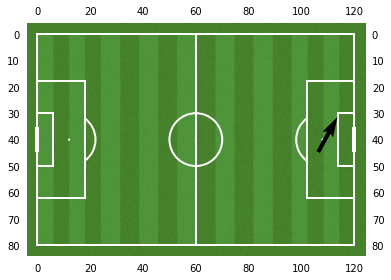

In [39]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, label = True)
fig, ax = pitch.draw()
pitch = pitch.arrows(df['X_scaled'][1], df ['Y_scaled'][1],df['X_scaled'][2], df ['Y_scaled'][2], ax=ax)
#pitch.annotate(text='center', xytext=(50, 50), xy=(60, 40), ha='center', va='center', ax=ax, arrowprops=dict(facecolor='black'))
plt.show()